In [20]:
import numpy as np
import pandas as pd

from typing import List, Tuple
import matplotlib.pyplot as plt
import math

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

seed = 1234

_Some code taken from hw1_

In [12]:
# Load the features and labels for the MNIST dataset
# This might take a minute to download the images.
fmnist_X, fmnist_y = fetch_openml(name='Fashion-MNIST', as_frame=False, return_X_y=True)

# Convert labels to integer data type
fmnist_y = fmnist_y.astype(int)

X_tr, X_te, y_tr, y_te = train_test_split(fmnist_X, fmnist_y, test_size=0.25, random_state=1234, shuffle=True)

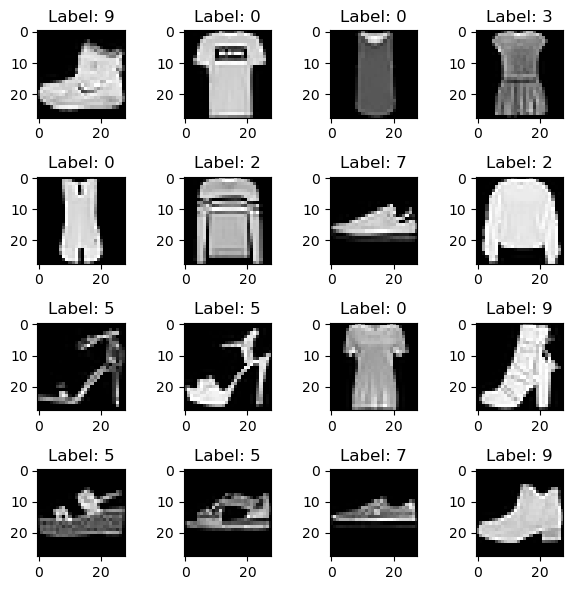

In [13]:
# Some default settings for our plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Create a figure with 4 rows and 4 columns
figure, axes = plt.subplots(4, 4, figsize=(6, 6))  

### YOUR CODE STARTS HERE ###
# Plot the first 16 images in our dataset.
# Include a title on each subplot to indicate the corresponding label.
# (≈ 5 lines of code)
for i in range(16):
    axes[i//4][i%4].imshow(fmnist_X[i].reshape(28,28))
    axes[i//4, i%4].set_title(f'Label: {fmnist_y[i]}')

### YOUR CODE ENDS HERE  ###

plt.tight_layout()

## Procedure:

1. Train sci-kit classifier
2. Get accuracy, precision, recall, confusion matrix, roc auc
3. Plot learning curve
4. At the very end, plot everything against one another

## KNN


In [5]:
#Tim

## Logistic

In [11]:
#Brendon
classifier = LogisticRegression(penalty='l1', solver='liblinear', fit_intercept=True)
classifier.fit(X_tr, y_tr)
prediction = classifier.predict(X_te)

0.8446285714285714


Accuracy: 0.8446285714285714
Recall: 0.8446285714285714
Precision: 0.8421078469705134
ROC AUC: 0.9811841638738235


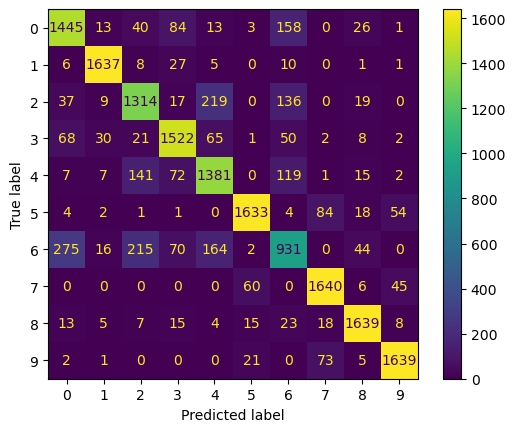

In [39]:
print("Accuracy: " + str(accuracy_score(y_te,prediction)))
print("Recall: " + str(recall_score(y_te, prediction, average="weighted")))
print("Precision: " +str(precision_score(y_te, prediction, average="weighted")))
probs = classifier.predict_proba(X_te)
print("ROC AUC: " +str(roc_auc_score(y_te, probs, multi_class="ovo")))
print("Confusion Matrix: ")
cm = confusion_matrix(y_te,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(); 

## Neural Network


In [ ]:
best_hyperparams = {
   'hidden_layer_sizes': (200,),
   'activation': 'relu', 
   'solver': 'sgd',
   'learning_rate': 'adaptive',
   'learning_rate_init': 0.01,
   'max_iter': 200,
   'n_iter_no_change': 200,
   'batch_size': 256
}

mlp = MLPClassifier(**best_hyperparams, shuffle=True, random_state=seed, verbose=False)
mlp.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

print("Accuracy: " + str(accuracy_score(y_te, y_pred)))
print("Recall: " + str(recall_score(y_te, y_pred, average="weighted")))
print("Precision: " + str(precision_score(y_te, y_pred, average="weighted")))
probs = mlp.predict_proba(X_te)
print("ROC AUC: " +str(roc_auc_score(y_te, probs, multi_class="ovo")))
print("Confusion Matrix: ")
cm = confusion_matrix(y_te, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(); 

## Decision Tree

Accuracy: 0.8076
Recall: 0.8076
Precision: 0.8071718206760017
ROC AUC: 0.9074593309892725
Confusion Matrix: 


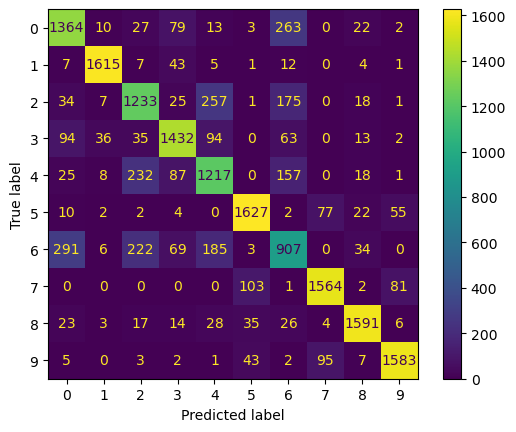

In [39]:
#Josh

clf = DecisionTreeClassifier(criterion='gini', min_samples_leaf=3, random_state=seed, max_depth = 20)
clf.fit(X_tr, y_tr)
y_pred = clf.predict(X_te)

print("Accuracy: " + str(accuracy_score(y_te, y_pred)))
print("Recall: " + str(recall_score(y_te, y_pred, average="weighted")))
print("Precision: " + str(precision_score(y_te, y_pred, average="weighted")))
probs = clf.predict_proba(X_te)
print("ROC AUC: " +str(roc_auc_score(y_te, probs, multi_class="ovo")))
print("Confusion Matrix: ")
cm = confusion_matrix(y_te, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(); 
